- 실제 image파일을 불러와서 convolution의 결과가 어떻게 나타나는 지를 확인해 봅니다.

In [0]:
import torch
from torch import nn
from skimage import io
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

uint8


torch.Size([512, 512])

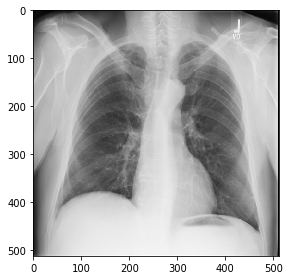

In [5]:
img = '/content/drive/My Drive/Class/2020-1-bmeAI/rsna2019/100/normal/0a50d5b7-436c-464e-aba4-4264cebb35be.png'
I =io.imread(img)
print(I.dtype)
io.imshow(I)
I = torch.tensor(I)
I.shape

In [6]:
K = torch.tensor([[1,-1]])
Y = corr2d(I, K)
Y.shape
Y.dtype

torch.float32

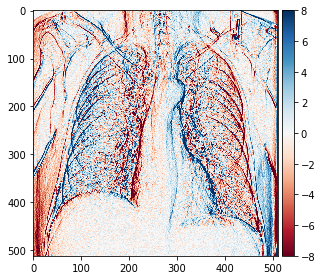

In [7]:
io.imshow(Y.numpy(),vmin=-8,vmax=8)